In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import pickle
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
#from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


In [ ]:
#STEP 1: DATA READING AND UNDERSTANDING

df = pd.read_csv("/content/Drive/MyDrive/e-comerce dataset/data.csv")
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:

sizes = df['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64


([<matplotlib.patches.Wedge at 0x7f656c2f56d0>,
 [Text(-0.3290237775458344, 1.0496396304491695, ''),
  Text(0.3290237775458339, -1.0496396304491697, '')],
 [Text(-0.17946751502500058, 0.5725307075177288, '59.7%'),
  Text(0.17946751502500027, -0.5725307075177289, '40.3%')])

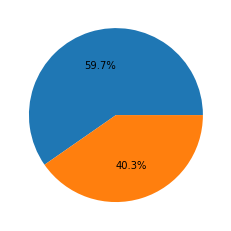

In [ ]:
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [ ]:
df.drop(['ID'], axis=1, inplace=True)

df.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [ ]:
df_reached = df[df['Reached.on.Time_Y.N'] == 0]
df_not_reached = df[df['Reached.on.Time_Y.N'] == 1]

In [ ]:
df_reached_downsampled = resample(df_reached,replace=False,n_samples=4000,random_state=25) 
df_not_reached_downsampled = resample(df_not_reached,replace=False,n_samples=4000,random_state=25) 

In [ ]:
df_downsampled = pd.concat([df_not_reached_downsampled,df_reached_downsampled])
print(len(df_downsampled))

8000


1    4000
0    4000
Name: Reached.on.Time_Y.N, dtype: int64


([<matplotlib.patches.Wedge at 0x7f077421ec90>,
 [Text(6.735557395310444e-17, 1.1, ''),
  Text(-2.0206672185931328e-16, -1.1, '')],
 [Text(3.6739403974420595e-17, 0.6, '50.0%'),
  Text(-1.1021821192326178e-16, -0.6, '50.0%')])

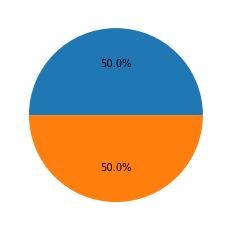

In [ ]:
#Count class values to see the split between elible and poisonous
sizes = df_downsampled['Reached.on.Time_Y.N'].value_counts(sort = 1)
print(sizes)
plt.pie(sizes, autopct='%1.1f%%')

In [ ]:
df_downsampled.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
2554,C,Ship,5,5,264,3,medium,F,23,2837,1
2529,B,Ship,2,1,255,3,low,M,19,1551,1
1073,F,Road,3,1,148,2,medium,M,34,1053,1
9432,D,Road,6,3,271,4,low,F,2,1364,1
2539,F,Ship,2,5,252,2,low,F,21,2070,1


In [ ]:
X=df_downsampled.drop('Reached.on.Time_Y.N',axis=1).copy()
X.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
2554,C,Ship,5,5,264,3,medium,F,23,2837
2529,B,Ship,2,1,255,3,low,M,19,1551
1073,F,Road,3,1,148,2,medium,M,34,1053
9432,D,Road,6,3,271,4,low,F,2,1364
2539,F,Ship,2,5,252,2,low,F,21,2070


In [ ]:
y=df_downsampled['Reached.on.Time_Y.N'].copy()
y.head()

2554    1
2529    1
1073    1
9432    1
2539    1
Name: Reached.on.Time_Y.N, dtype: int64

In [ ]:
df_downsampled.select_dtypes(['object'])

,Warehouse_block,Mode_of_Shipment,Product_importance,Gender
2554,C,Ship,medium,F
2529,B,Ship,low,M
1073,F,Road,medium,M
9432,D,Road,low,F
2539,F,Ship,low,F
...,...,...,...,...
8144,A,Ship,medium,F
6242,A,Ship,medium,F
9839,F,Road,low,F
10643,F,Ship,medium,M


In [ ]:
X_encoded=pd.get_dummies(X,columns=['Warehouse_block','Mode_of_Shipment'])
X_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
2554,5,5,264,3,medium,F,23,2837,0,0,1,0,0,0,0,1
2529,2,1,255,3,low,M,19,1551,0,1,0,0,0,0,0,1
1073,3,1,148,2,medium,M,34,1053,0,0,0,0,1,0,1,0
9432,6,3,271,4,low,F,2,1364,0,0,0,1,0,0,1,0
2539,2,5,252,2,low,F,21,2070,0,0,0,0,1,0,0,1


In [ ]:
label_encoder_data =X_encoded
label_encoder = LabelEncoder()
for col in X_encoded.select_dtypes(['object']):
  
  label_encoder_data[col] = label_encoder.fit_transform(label_encoder_data[col])
X_encoded = label_encoder_data

In [ ]:
X_encoded.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship
2554,5,5,264,3,2,0,23,2837,0,0,1,0,0,0,0,1
2529,2,1,255,3,1,1,19,1551,0,1,0,0,0,0,0,1
1073,3,1,148,2,2,1,34,1053,0,0,0,0,1,0,1,0
9432,6,3,271,4,1,0,2,1364,0,0,0,1,0,0,1,0
2539,2,5,252,2,1,0,21,2070,0,0,0,0,1,0,0,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=35,)

In [ ]:
model = RandomForestClassifier( )

In [ ]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test = model.predict(X_test)

In [ ]:
#Print the prediction accuracy
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test))

Accuracy =  0.72


In [ ]:
param_grid = [
              {'criterion': ['gini', 'entropy'],
                          'max_depth': list(range(3,25)),
                          'n_estimators': list(range(90,121))}
                       
                       ]

In [ ]:
optimal_params = GridSearchCV(
    RandomForestClassifier(),
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=2
)

In [ ]:
optimal_params.fit(X_train,y_train)


Fitting 3 folds for each of 1364 candidates, totalling 4092 fits
[CV] criterion=gini, max_depth=3, n_estimators=90 ....................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..... criterion=gini, max_depth=3, n_estimators=90, total=   0.3s
[CV] criterion=gini, max_depth=3, n_estimators=90 ....................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=gini, max_depth=20, n_estimators=93 ...................
[CV] .... criterion=gini, max_depth=20, n_estimators=93, total=   0.6s
[CV] criterion=gini, max_depth=20, n_estimators=94 ...................
[CV] .... criterion=gini, max_depth=20, n_estimators=94, total=   0.6s
[CV] criterion=gini, max_depth=20, n_estimators=94 ...................
[CV] .... criterion=gini, max_depth=20, n_estimators=94, total=   0.6s
[CV] criterion=gini, max_depth=20, n_estimators=94 ...................
[CV] .... criterion=gini, max_depth=20, n_estimators=94, total=   0.6s
[CV] criterion=gini, max_depth=20, n_estimators=95 ...................
[CV] .... criterion=gini, max_depth=20, n_estimators=95, total=   0.6s
[CV] criterion=gini, max_depth=20, n_estimators=95 ...................
[CV] .... criterion=gini, max_depth=20, n_estimators=95, total=   0.6s
[CV] criterion=gini, max_depth=20, n_estimators=95 ...................
[CV] .... criterion=gini, 

[Parallel(n_jobs=1)]: Done 4092 out of 4092 | elapsed: 39.5min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,...
             iid='deprecated', n_jobs=None,
             param_grid=[{'criterion': ['gini', 'entropy'],
       

In [ ]:
print(optimal_params.best_params_)

{'criterion': 'entropy', 'max_depth': 6, 'n_estimators': 103}


In [ ]:
model2=RandomForestClassifier(criterion='entropy',max_depth=6 , n_estimators=103)

In [ ]:
model2.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=103,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
prediction_test2 = model2.predict(X_test)

In [ ]:
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_test2))

Accuracy =  0.73875


################################################################################################################################################################

****************************************************************************************

In [ ]:
# save the model to disk
filename = '/content/Drive/MyDrive/e-comerce model/model_RF_ecommerce_73-93.sav'
pickle.dump(model2, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))


In [ ]:
prediction_loaded_model = loaded_model.predict(X_test)
print ("Accuracy = ", metrics.accuracy_score(y_test, prediction_loaded_model))

Accuracy =  0.73875


In [ ]:
cm = metrics.confusion_matrix(y_test,prediction_loaded_model)
print(cm)

[[769  15]
 [403 413]]


In [ ]:
feature_list = list(X_encoded.columns)
feature_imp = pd.Series(model2.feature_importances_,index=feature_list).sort_values(ascending=False)
print(feature_imp)

Discount_offered           0.539888
Weight_in_gms              0.305795
Prior_purchases            0.054881
Cost_of_the_Product        0.048924
Customer_care_calls        0.021059
Customer_rating            0.005729
Product_importance         0.005496
Gender                     0.003252
Mode_of_Shipment_Ship      0.002393
Warehouse_block_B          0.002050
Mode_of_Shipment_Flight    0.001959
Warehouse_block_F          0.001953
Warehouse_block_C          0.001933
Warehouse_block_A          0.001767
Warehouse_block_D          0.001491
Mode_of_Shipment_Road      0.001430
dtype: float64


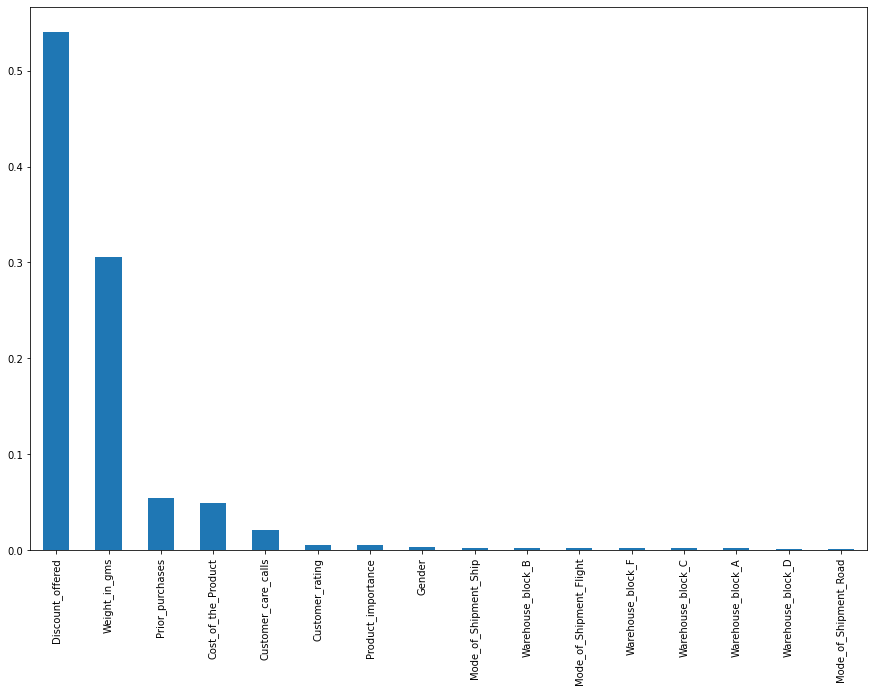

In [ ]:
feature_imp.plot(kind='bar',figsize=(15,10))

In [ ]:
df_downsampled.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_care_calls,8000.0,4.071875,1.141982,2.0,3.0,4.0,5.0,7.0
Customer_rating,8000.0,2.979375,1.414019,1.0,2.0,3.0,4.0,5.0
Cost_of_the_Product,8000.0,210.782000,48.134175,96.0,170.0,216.0,251.0,310.0
Prior_purchases,8000.0,3.593625,1.542087,2.0,3.0,3.0,4.0,10.0
Discount_offered,8000.0,12.263250,15.338835,1.0,4.0,7.0,10.0,65.0
Weight_in_gms,8000.0,3729.122750,1638.301794,1001.0,1870.5,4275.5,5121.0,7846.0
Reached.on.Time_Y.N,8000.0,0.500000,0.500031,0.0,0.0,0.5,1.0,1.0
